In [1]:
import pandas as pd

In [2]:
url = 'http://www-stat.stanford.edu/~tibs/ElemStatLearn/datasets/SAheart.data'
saheart_df = pd.read_csv(url)

In [3]:
saheart_df.head(5)

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [6]:
saheart_df.info()#the data has 462 entries/records and have 11 columns with column as categorical variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   row.names  462 non-null    int64  
 1   sbp        462 non-null    int64  
 2   tobacco    462 non-null    float64
 3   ldl        462 non-null    float64
 4   adiposity  462 non-null    float64
 5   famhist    462 non-null    object 
 6   typea      462 non-null    int64  
 7   obesity    462 non-null    float64
 8   alcohol    462 non-null    float64
 9   age        462 non-null    int64  
 10  chd        462 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 39.8+ KB


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

<AxesSubplot:xlabel='famhist', ylabel='chd'>

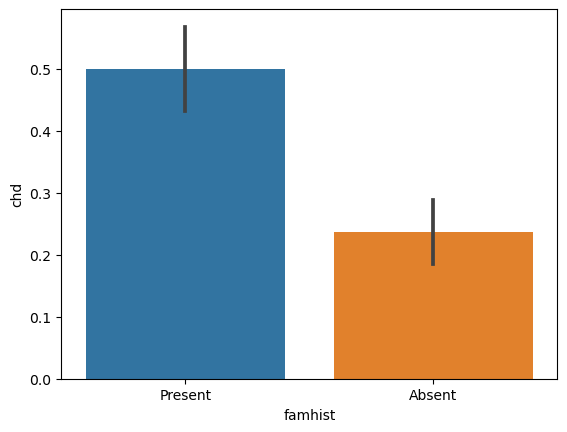

In [8]:
sn.barplot(x= 'famhist', y= 'chd', data= saheart_df)

<AxesSubplot:xlabel='age', ylabel='sbp'>

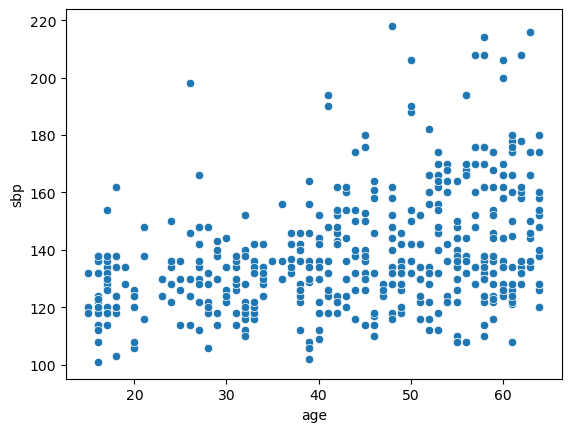

In [9]:
sn.scatterplot(x= 'age', y= 'sbp', data= saheart_df)

<AxesSubplot:xlabel='age', ylabel='sbp'>

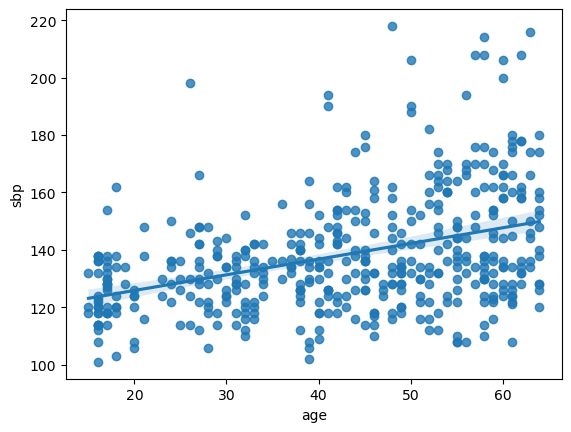

In [10]:
sn.regplot(x= 'age', y= 'sbp', data= saheart_df)

/Users/ishutejwani/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ishutejwani/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


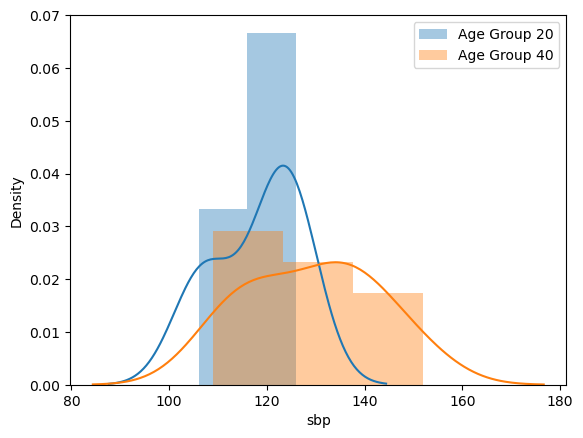

In [11]:
sn.distplot(saheart_df.groupby('age').get_group(20)['sbp'], label= 'Age Group 20')
sn.distplot(saheart_df.groupby('age').get_group(40)['sbp'], label= 'Age Group 40');
plt.legend()

/Users/ishutejwani/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ishutejwani/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


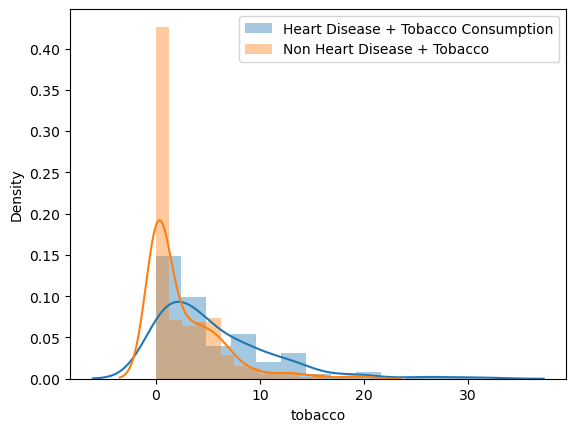

In [12]:
sn.distplot(saheart_df[saheart_df['chd'] == 1]['tobacco'], label= 'Heart Disease + Tobacco Consumption')
sn.distplot(saheart_df[saheart_df['chd']== 0]['tobacco'], label= 'Non Heart Disease + Tobacco')
plt.legend()

In [13]:
saheart_df[['chd', 'tobacco']].corr()#29% chances of chd are higher if you consume tobacco

,chd,tobacco
chd,1.000000,0.299718
tobacco,0.299718,1.000000


In [14]:
saheart_df.groupby('chd')['tobacco'].mean()#shows that tobacco consumption is high of people diagonised with chd

chd
0    2.634735
1    5.524875
Name: tobacco, dtype: float64

In [15]:
features = ['sbp', 'obesity', 'age', 'ldl']

/Users/ishutejwani/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


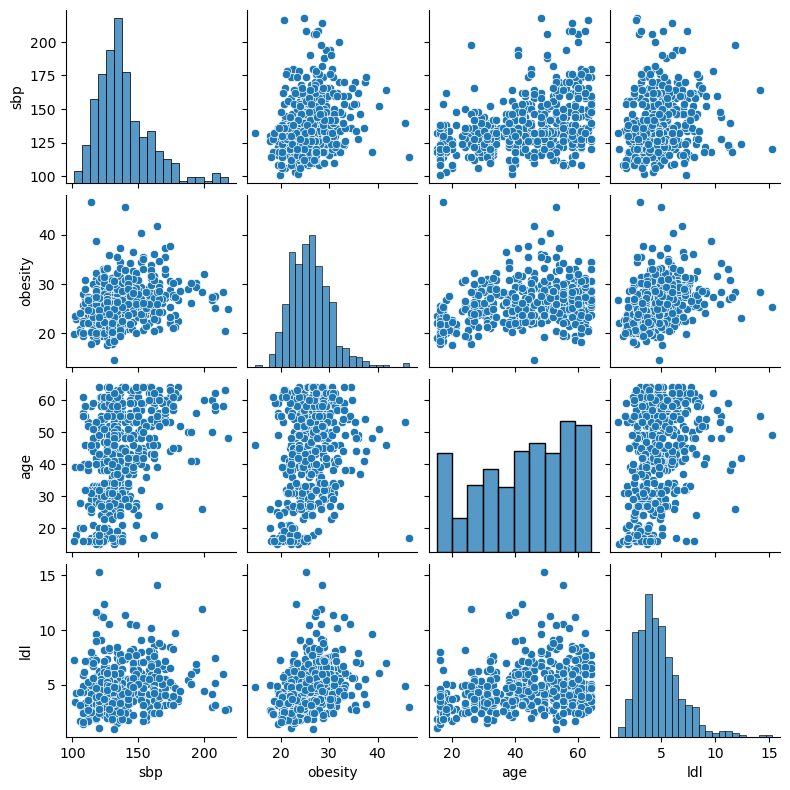

In [16]:
sn.pairplot(saheart_df[features], size= 2)

<AxesSubplot:>

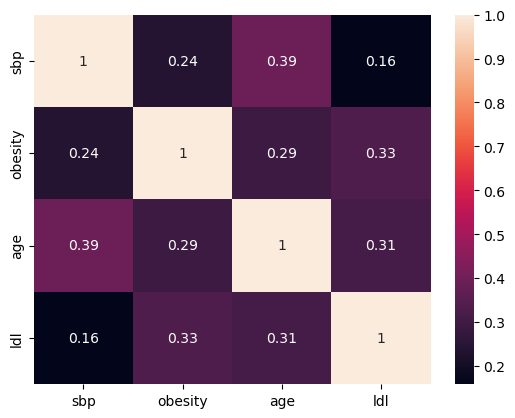

In [17]:
sn.heatmap(saheart_df[features].corr(), annot= True)

In [18]:
bins = [0, 15, 35, 55, float('inf')]#defining the age split range

In [19]:
labels = ['young', 'adults', 'mid', 'old']#labeling the split range

In [20]:
saheart_df['agegroup'] = pd.cut(saheart_df['age'], bins= bins, labels= labels, right= False)#using pd.cut
#to cut of the agegroup from the age. here right = false means that the upper limit is not included in the range
saheart_df.head(5)

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd,agegroup
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1,mid
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1,old
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0,mid
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1,old
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1,mid


<AxesSubplot:xlabel='agegroup', ylabel='chd'>

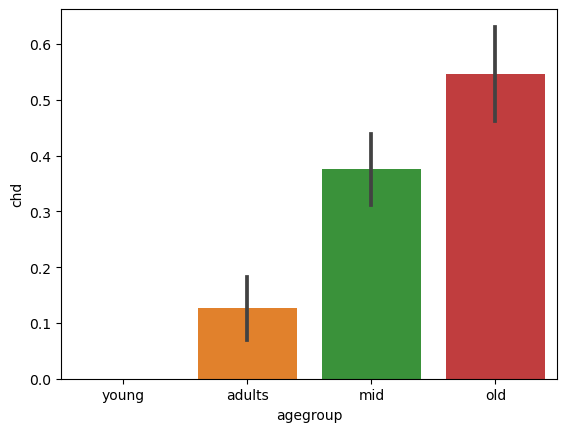

In [21]:
sn.barplot(x= 'agegroup', y= 'chd', data= saheart_df)#shows that people with age above 55 get more heart 
#related issues followed by with age group of 35-55

<AxesSubplot:xlabel='agegroup', ylabel='ldl'>

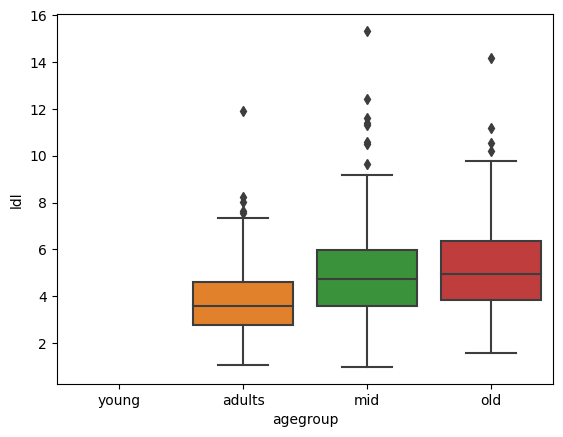

In [22]:
sn.boxplot(x= 'agegroup', y= 'ldl', data= saheart_df)

In [23]:
saheart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   row.names  462 non-null    int64   
 1   sbp        462 non-null    int64   
 2   tobacco    462 non-null    float64 
 3   ldl        462 non-null    float64 
 4   adiposity  462 non-null    float64 
 5   famhist    462 non-null    object  
 6   typea      462 non-null    int64   
 7   obesity    462 non-null    float64 
 8   alcohol    462 non-null    float64 
 9   age        462 non-null    int64   
 10  chd        462 non-null    int64   
 11  agegroup   462 non-null    category
dtypes: category(1), float64(5), int64(5), object(1)
memory usage: 40.5+ KB


In [24]:
saheart_df.chd.value_counts()

0    302
1    160
Name: chd, dtype: int64

In [25]:
X_features = list(saheart_df.columns)#assigning features to X
X_features

['row.names',
 'sbp',
 'tobacco',
 'ldl',
 'adiposity',
 'famhist',
 'typea',
 'obesity',
 'alcohol',
 'age',
 'chd',
 'agegroup']

In [26]:
X_features.remove('row.names')
X_features.remove('agegroup')
X_features.remove('chd')
X_features#removed unwanted columns from the features set

['sbp',
 'tobacco',
 'ldl',
 'adiposity',
 'famhist',
 'typea',
 'obesity',
 'alcohol',
 'age']

In [27]:
encoded_saheart_df = pd.get_dummies(saheart_df[X_features], drop_first= True)#doing one hot encoding that is 
#converting categorical variables into continuous variables

In [28]:
list(encoded_saheart_df)

['sbp',
 'tobacco',
 'ldl',
 'adiposity',
 'typea',
 'obesity',
 'alcohol',
 'age',
 'famhist_Present']

In [29]:
import statsmodels.api as sm
Y = saheart_df.chd
X = sm.add_constant(encoded_saheart_df)

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size= 0.3, random_state= 42)

In [31]:
logit = sm.Logit(y_train, X_train)
logit_model = logit.fit()

Optimization terminated successfully.
         Current function value: 0.515459
         Iterations 6


In [32]:
logit_model.summary2()#the model shows that the R2 is 19.9% and shows that the variables ldl, typea, age,
#famhist_present are significant at p value of 0.05 as their pvalue is lesser than 0.05. Also, model p value
# is less than 0.05

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.199     
Dependent Variable: chd              AIC:              352.9863  
Date:               2023-10-04 13:49 BIC:              390.7628  
No. Observations:   323              Log-Likelihood:   -166.49   
Df Model:           9                LL-Null:          -207.83   
Df Residuals:       313              LLR p-value:      4.7595e-14
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
const             -6.5732   1.5863 -4.1437 0.0000 -9.6823 -3.4640
sbp                0.0097   0.0068  1.4272 0.1535 -0.0036  0.0230
tobacco            0.0619   0.0319  1.9390 0.0525 -0.0007  0.1245
ldl                0.2067   0.0717  2.8837 0.0039  0.0662  0.3472
adiposity          0.0262   0.0347  0.7554 0.4500 -0.0418  0.0942
typea              0.0387   0.0149  2.5972 0.0094  0.0095  0.0679
obesity           -0.0646   0.0510 -1.2661 0.2055 -0.1645  0.0354
alcohol            0.0011   0.0063  0.1777 0.8590 -0.0113  0.0135
age                0.0415   0.0143  2.9071 0.0036  0.0135  0.0696
famhist_Present    0.7519   0.2731  2.7533 0.0059  0.2167  1.2872
=================================================================

"""

In [33]:
def get_significant_vars(lm):
    var_pvals_df = pd.DataFrame(lm.pvalues)
    var_pvals_df['vars'] = var_pvals_df.index
    var_pvals_df.columns = ['pvals', 'vars']
    return list(var_pvals_df[var_pvals_df.pvals <= 0.05]['vars'])

In [34]:
significant_variables = get_significant_vars(logit_model)
significant_variables

['const', 'ldl', 'typea', 'age', 'famhist_Present']

In [35]:
X_train = sm.add_constant(X_train[significant_variables])

In [36]:
final_logit = sm.Logit(y_train, X_train)
final_logit_model = final_logit.fit()

Optimization terminated successfully.
         Current function value: 0.528087
         Iterations 6


In [37]:
final_logit_model.summary2()#shows that the famhist increases the chances of chd by 0.7 times followed by
#ldl, age and typea

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.179     
Dependent Variable: chd              AIC:              351.1443  
Date:               2023-10-04 13:49 BIC:              370.0326  
No. Observations:   323              Log-Likelihood:   -170.57   
Df Model:           4                LL-Null:          -207.83   
Df Residuals:       318              LLR p-value:      2.5286e-15
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
const             -6.6526   1.1139 -5.9723 0.0000 -8.8358 -4.4694
ldl                0.2028   0.0648  3.1320 0.0017  0.0759  0.3298
typea              0.0372   0.0145  2.5625 0.0104  0.0088  0.0657
age                0.0592   0.0111  5.3278 0.0000  0.0374  0.0809
famhist_Present    0.7004   0.2666  2.6275 0.0086  0.1779  1.2228
=================================================================

"""

In [38]:
y_pred = final_logit_model.predict(X_test[significant_variables])

In [39]:
y_pred_df = pd.DataFrame({'actual': y_test, 'predicted_prob': y_pred})
y_pred_df.head(5)

,actual,predicted_prob
225,0,0.264739
30,1,0.215969
39,1,0.810223
222,0,0.564580
124,0,0.235855


In [40]:
#taking random cut-off at 0.3 for probability value
#creating a confusion matrix

In [42]:
y_pred_df['predicted'] = y_pred_df.predicted_prob.map(lambda x: 1
                                                     if x > 0.3 else 0)
y_pred_df.head(5)

,actual,predicted_prob,predicted
225,0,0.264739,0
30,1,0.215969,0
39,1,0.810223,1
222,0,0.564580,1
124,0,0.235855,0


In [43]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [46]:
from sklearn.metrics import confusion_matrix
def draw_cm(actual, predicted):
    cm = confusion_matrix(actual, predicted)
    sn.heatmap(cm, annot= True, fmt= '.2f',
    xticklabels = ['Heart Disease', 'No Heart Disease'], yticklabels= ['Heart Disease', 'No Heart Disease'])
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

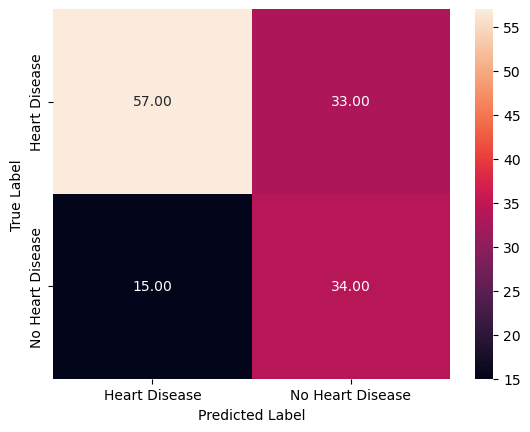

In [47]:
draw_cm(y_pred_df.actual, y_pred_df.predicted)

In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_pred_df.actual, y_pred_df.predicted))

              precision    recall  f1-score   support

           0       0.79      0.63      0.70        90
           1       0.51      0.69      0.59        49

    accuracy                           0.65       139
   macro avg       0.65      0.66      0.64       139
weighted avg       0.69      0.65      0.66       139



/Users/ishutejwani/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


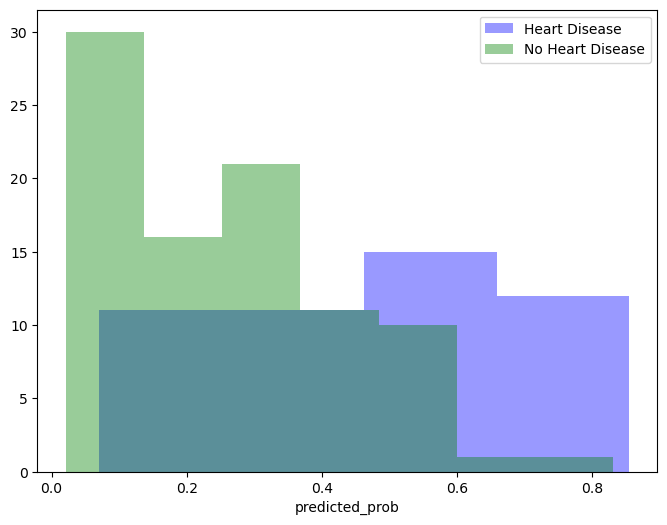

In [50]:
plt.figure(figsize=(8,6))
sn.distplot(y_pred_df[y_pred_df.actual == 1]['predicted_prob'], kde= False, color= 'b',
           label= 'Heart Disease')
sn.distplot(y_pred_df[y_pred_df.actual == 0]['predicted_prob'], kde= False, color= 'g',
           label= 'No Heart Disease')
plt.legend()
plt.show()

In [51]:
from sklearn.metrics import roc_curve, roc_auc_score
def draw_roc(actual, prob_val):
    fpr, tpr, thresholds = roc_curve(actual, prob_val, drop_intermediate= False)
    auc_score = roc_auc_score(actual, prob_val)
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, label = 'ROC curve (area = %0.2f)' %auc_score)
    plt.plot([0,1], [0,1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1- True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.legend(loc = 'lower right')
    plt.show()
    return fpr, tpr, thresholds

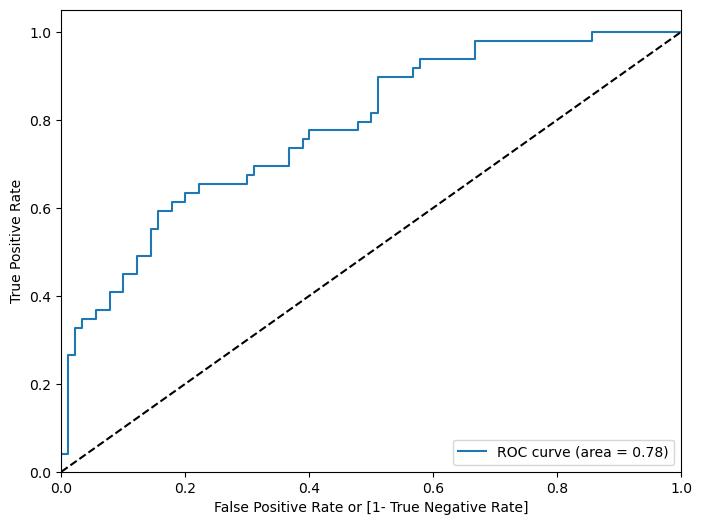

In [52]:
fpr, tpr, thresholds = draw_roc(y_pred_df.actual, y_pred_df.predicted_prob)

In [53]:
#using youdon's index to get the best cut off for selecting prob value
tpr_fpr = pd.DataFrame({'tpr': tpr, 'fpr': fpr, 'thresholds': thresholds})
tpr_fpr['diff'] = tpr_fpr.tpr - tpr_fpr.fpr
tpr_fpr.sort_values('diff', ascending= False)[0:5]#youdon's index shows that the cut off should be 0.43

,tpr,fpr,thresholds,diff
43,0.591837,0.155556,0.434413,0.436281
46,0.612245,0.177778,0.421181,0.434467
49,0.632653,0.200000,0.414076,0.432653
52,0.653061,0.222222,0.405464,0.430839
44,0.591837,0.166667,0.430871,0.425170


In [54]:
y_pred_df['predicted_new'] = y_pred_df.predicted_prob.map(lambda x: 1 if x > 0.43 else 0)

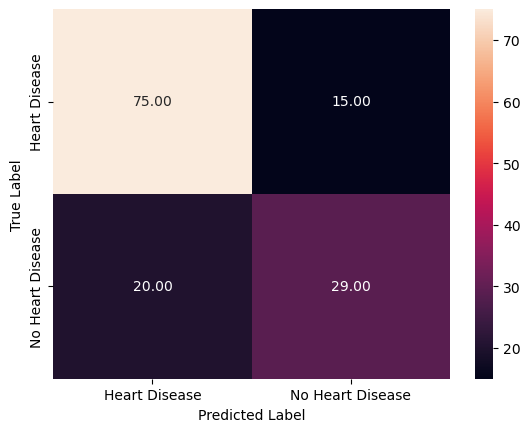

In [56]:
draw_cm(y_pred_df.actual, y_pred_df.predicted_new)

In [57]:
print(classification_report(y_pred_df.actual, y_pred_df.predicted_new))#the f1 score has improved for both cases

              precision    recall  f1-score   support

           0       0.79      0.83      0.81        90
           1       0.66      0.59      0.62        49

    accuracy                           0.75       139
   macro avg       0.72      0.71      0.72       139
weighted avg       0.74      0.75      0.74       139



In [59]:
#building decision tree next

In [60]:
Y = saheart_df.chd
X = encoded_saheart_df

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size= 0.3, random_state= 42)

In [74]:
from sklearn.tree import DecisionTreeClassifier
clf_tree = DecisionTreeClassifier(criterion= 'gini', max_depth= 4)

In [80]:
clf_model = clf_tree.fit(X_train, y_train)

In [84]:
tree_predict = clf_model.predict(X_test)
roc_auc_score(y_test, tree_predict)

0.573469387755102

In [78]:
from sklearn.tree import export_graphviz
import pydotplus as pdot
from IPython.display import Image

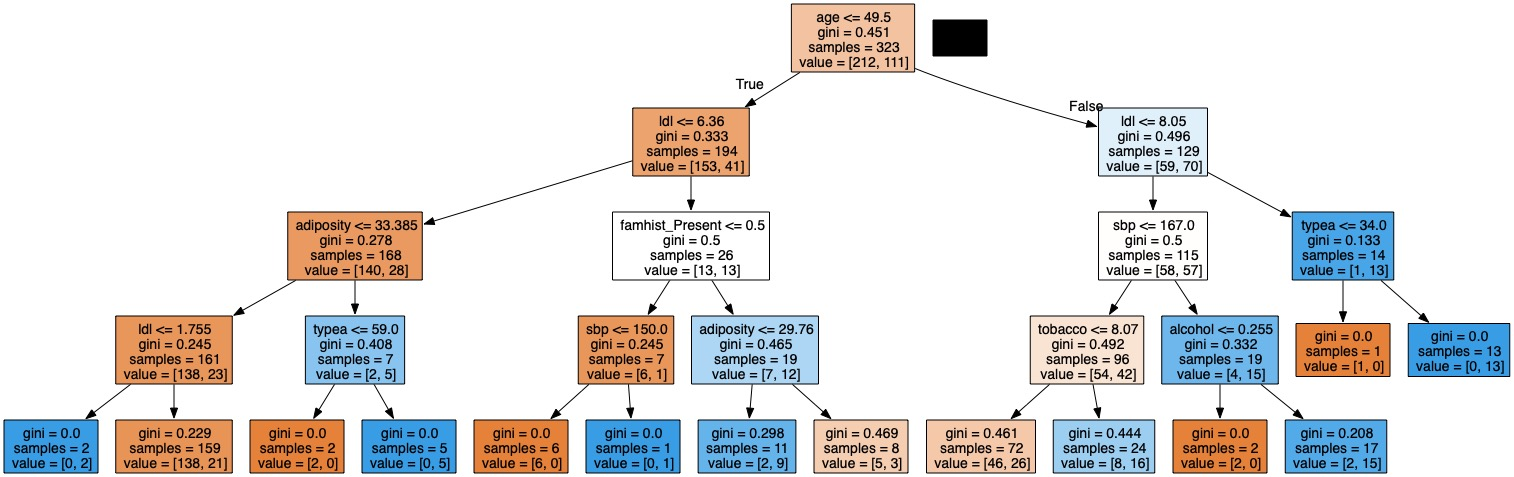

In [79]:
export_graphviz(clf_tree, out_file= 'chd_tree.dot', feature_names= X_train.columns, filled= True)
chd_tree_graph = pdot.graphviz.graph_from_dot_file('chd_tree.dot')
chd_tree_graph.write_jpg('chd_tree.png')
Image(filename= 'chd_tree.png')

In [88]:
y_pred_dt_df = pd.DataFrame({'actual': y_test, 'predicted': tree_predict})
y_pred_dt_df.head(5)

,actual,predicted
225,0,0
30,1,0
39,1,1
222,0,1
124,0,0


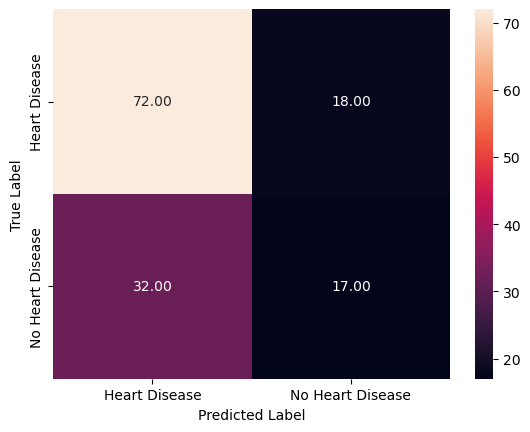

In [89]:
draw_cm(y_pred_dt_df.actual, y_pred_dt_df.predicted)

In [90]:
print(classification_report(y_pred_dt_df.actual, y_pred_dt_df.predicted))#this showcases that the recall for chd 1
#is less than the logistics regression.

              precision    recall  f1-score   support

           0       0.69      0.80      0.74        90
           1       0.49      0.35      0.40        49

    accuracy                           0.64       139
   macro avg       0.59      0.57      0.57       139
weighted avg       0.62      0.64      0.62       139



In [91]:
#now we need to perform GridSearchCV to find the optimal parameter and tree depth for decision tree 

In [92]:
from sklearn.model_selection import GridSearchCV
tuned_parameter = [{'criterion': ['gini', 'entropy'], 'max_depth': range(3, 10)}]
clf_tree = DecisionTreeClassifier()
clf = GridSearchCV(clf_tree, tuned_parameter, cv= 10, scoring= 'roc_auc')
clf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(3, 10)}],
             scoring='roc_auc')

In [93]:
clf.best_params_

{'criterion': 'gini', 'max_depth': 3}

In [94]:
clf.best_score_

0.6180752328479602

In [95]:
from sklearn.tree import DecisionTreeClassifier
clf_tree = DecisionTreeClassifier(criterion= 'gini', max_depth= 3)

In [97]:
clf_model = clf_tree.fit(X_train, y_train)

In [98]:
tree_predict = clf_model.predict(X_test)
roc_auc_score(y_test, tree_predict)

0.5196145124716555

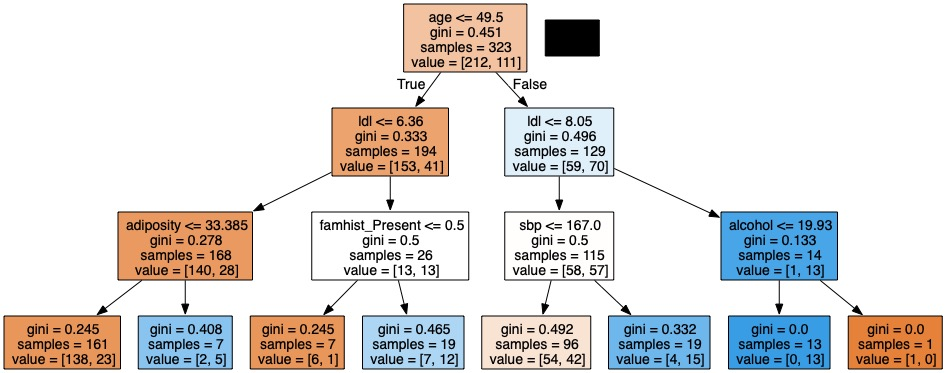

In [99]:
export_graphviz(clf_tree, out_file= 'chd_tree.dot', feature_names= X_train.columns, filled= True)
chd_tree_graph = pdot.graphviz.graph_from_dot_file('chd_tree.dot')
chd_tree_graph.write_jpg('chd_tree.png')
Image(filename= 'chd_tree.png')

In [100]:
y_pred_dt_df = pd.DataFrame({'actual': y_test, 'predicted': tree_predict})
y_pred_dt_df.head(5)

,actual,predicted
225,0,0
30,1,0
39,1,0
222,0,1
124,0,0


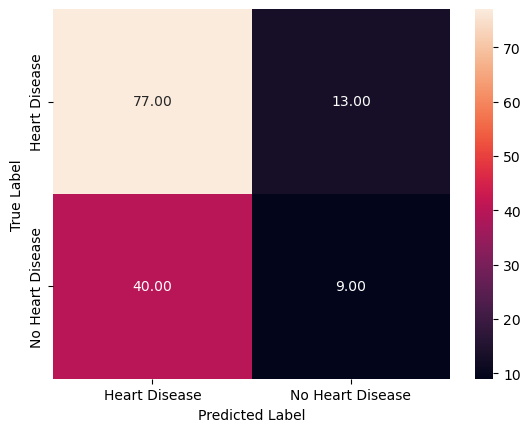

In [101]:
draw_cm(y_pred_dt_df.actual, y_pred_dt_df.predicted)

In [102]:
print(classification_report(y_pred_dt_df.actual, y_pred_dt_df.predicted))#this reduces the recall further for 
#chd 1

              precision    recall  f1-score   support

           0       0.66      0.86      0.74        90
           1       0.41      0.18      0.25        49

    accuracy                           0.62       139
   macro avg       0.53      0.52      0.50       139
weighted avg       0.57      0.62      0.57       139

